In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Trực quan hóa theo ngành

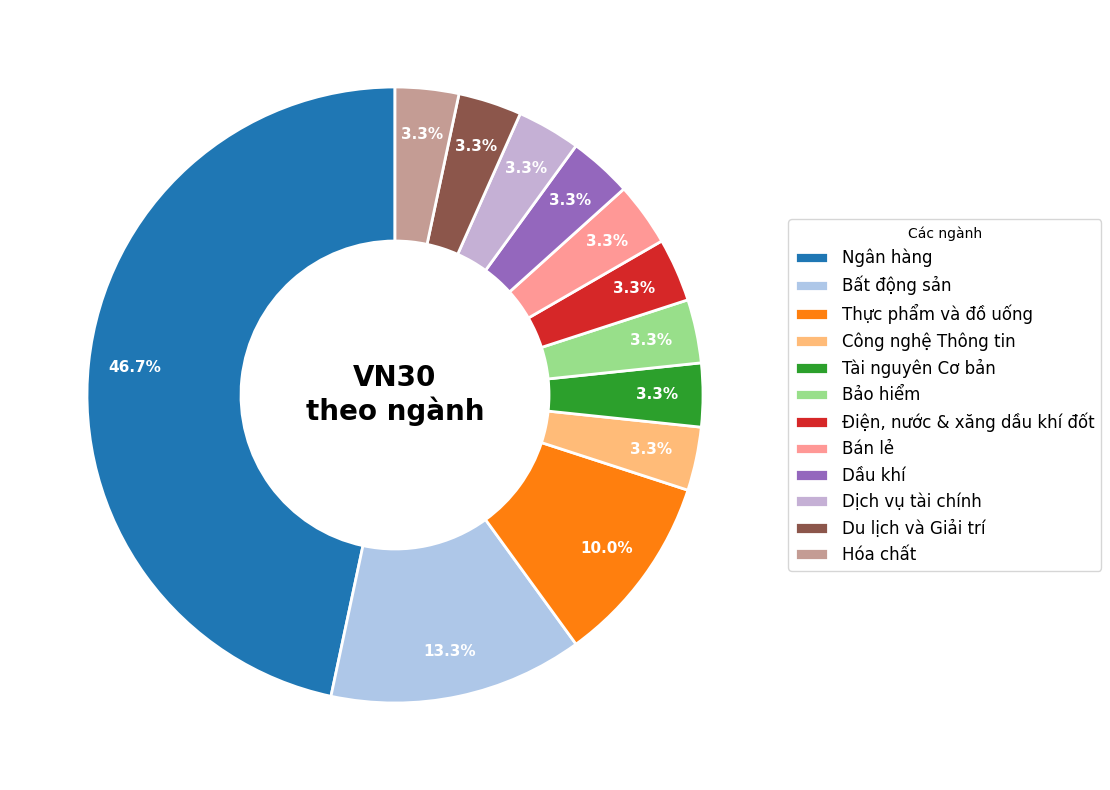

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

df = pd.read_csv('../data/vn30_info.csv')

# Đếm số lượng công ty theo ngành icb_name2
industry_counts = df["icb_name2"].value_counts()

# Tạo bảng màu đẹp hơn
colors = [
    '#3498db', '#e74c3c', '#2ecc71', '#9b59b6', '#f1c40f', 
    '#1abc9c', '#e67e22', '#34495e', '#7f8c8d', '#d35400'
]

# Mở rộng bảng màu nếu có nhiều hơn 10 ngành
if len(industry_counts) > 10:
    colors = plt.cm.tab20(np.arange(len(industry_counts)))

# Tạo figure với kích thước tùy chỉnh
plt.figure(figsize=(12, 8))

# Vẽ biểu đồ tròn với các cải tiến
wedges, texts, autotexts = plt.pie(
    industry_counts, 
    labels=None,  # Không hiển thị nhãn trực tiếp trên biểu đồ
    autopct='%1.1f%%', 
    startangle=90, 
    pctdistance=0.85,
    wedgeprops={
        'edgecolor': 'white',
        'linewidth': 2,
        'antialiased': True,
        'width': 0.5  # Tạo donut chart thay vì pie chart
    },
    colors=colors[:len(industry_counts)],
    textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'white'},
    shadow=False
)

# Tùy chỉnh văn bản phần trăm
for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

# Thêm hình tròn trắng ở giữa để tạo donut chart
circle = plt.Circle((0, 0), 0.3, fc='white')
plt.gca().add_artist(circle)

# Thêm tiêu đề vào giữa biểu đồ
plt.text(0, 0, 'VN30\ntheo ngành', 
         horizontalalignment='center',
         verticalalignment='center', 
         fontsize=20, 
         fontweight='bold')

# Tạo legend riêng với các nhãn và màu tương ứng
plt.legend(
    wedges, 
    industry_counts.index,
    title="Các ngành",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

# Cân bằng không gian cho legend
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

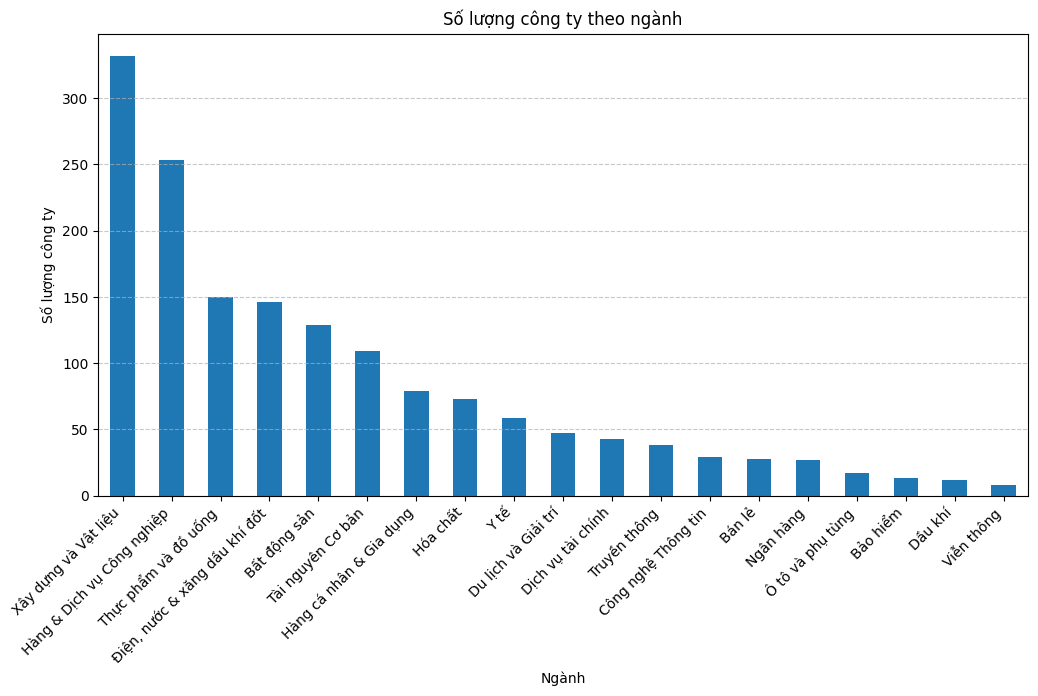

In [9]:
df = pd.read_csv('../data/all_info.csv')

# Đếm số lượng công ty theo ngành icb_name2
industry_counts = df["icb_name2"].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
industry_counts.plot(kind="bar")
plt.xlabel("Ngành")
plt.ylabel("Số lượng công ty")
plt.title("Số lượng công ty theo ngành")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Hiển thị biểu đồ
plt.show()

# 2. Trực quan hóa theo thanh khoản

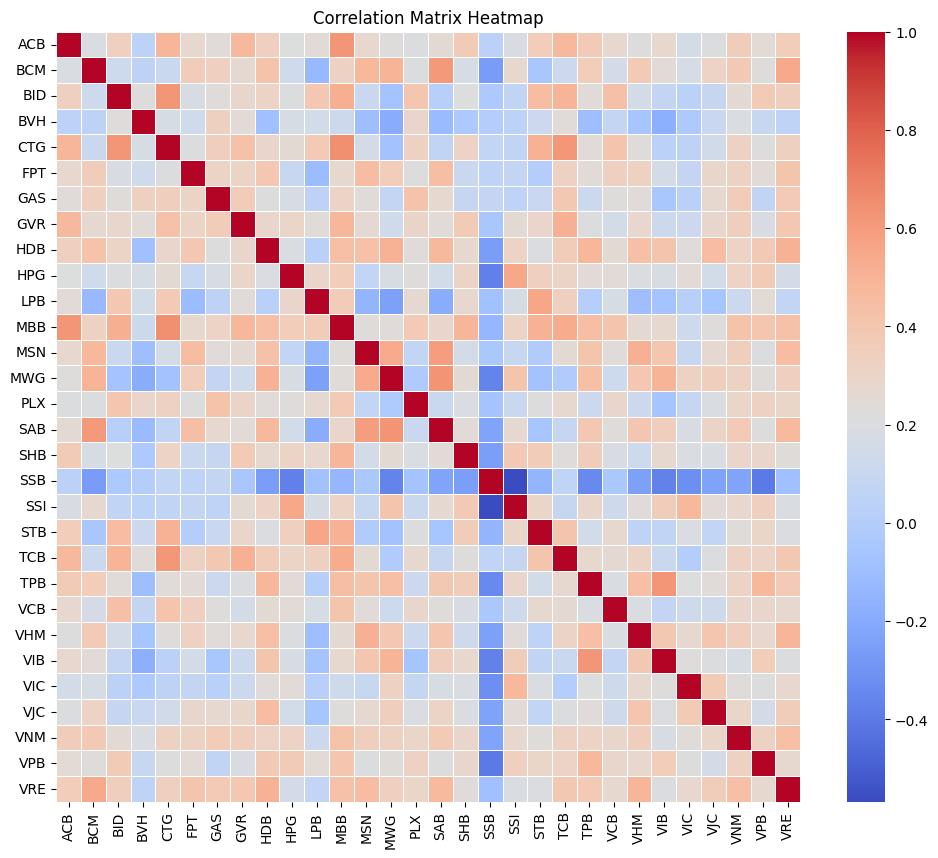

In [11]:
df = pd.read_csv('../data/vn30/volume.csv')

# Convert the 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Drop the 'time' column to compute correlations
df_numeric = df.drop(columns=['time'])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 10))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)

# Title for the heatmap
plt.title("Correlation Matrix Heatmap")

# Display the plot
plt.show()